<a href="https://colab.research.google.com/github/DrKenReid/Introductory-Data-Science/blob/main/Day_1_Lab_4_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised ML: Clustering & Dimensionality Reduction

## Dataset:
We will use the Iris dataset for this lab on unsupervised learning. The dataset consists of measurements of four features (variables) from three different species of Iris flowers:
1. Sepal Length: The length of the sepal, which is the outer part of the flower that protects the bud.
2. Sepal Width: The width of the sepal.
3. Petal Length: The length of the petal, which is the colorful part of the flower.
4. Petal Width: The width of the petal.

The three Iris species represented in the dataset are:
1. Iris Setosa
2. Iris Versicolor
3. Iris Virginica

The dataset contains a total of 150 samples, with 50 samples for each species. Each sample represents measurements of the four features for a single flower.

## Import libraries; data preprocessing

In [5]:
# Importing necessary libraries

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# show scaled vs original data
print("Original Data:")
print(X[:5])
print("\nScaled Data:")
print(X_scaled[:5])

Original Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Scaled Data:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


# Clustering

In [6]:
# Applying K-means Clustering
## Initialize KMeans with 3 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluating K-means Clustering
## silhouette score to assess the quality of the cluster assignments
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print("Silhouette Score (K-means):", silhouette_kmeans)

# Applying Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Evaluating Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
print("Silhouette Score (Hierarchical):", silhouette_hierarchical)

# Performing PCA
## Initialize PCA to reduce dimensions to 2 for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Performing t-SNE for later visualizations
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

Silhouette Score (K-means): 0.45994823920518635
Silhouette Score (Hierarchical): 0.4466890410285909


Silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to +1, where a high value indicates that objects are well-matched to their own cluster and poorly matched to neighboring clusters.


t-SNE (t-distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used to visualize high-dimensional data by mapping it into a lower-dimensional space, while preserving the local structure of the data points.

PCA (Principal Component Analysis) is a dimensionality reduction technique that transforms data by projecting it onto new axes, called principal components, which capture the maximum variance in the dataset.

#### How to choose the optimal number of clusters?

The elbow method that plots the percentage of variance explained by the clusters against the number of clusters can help.


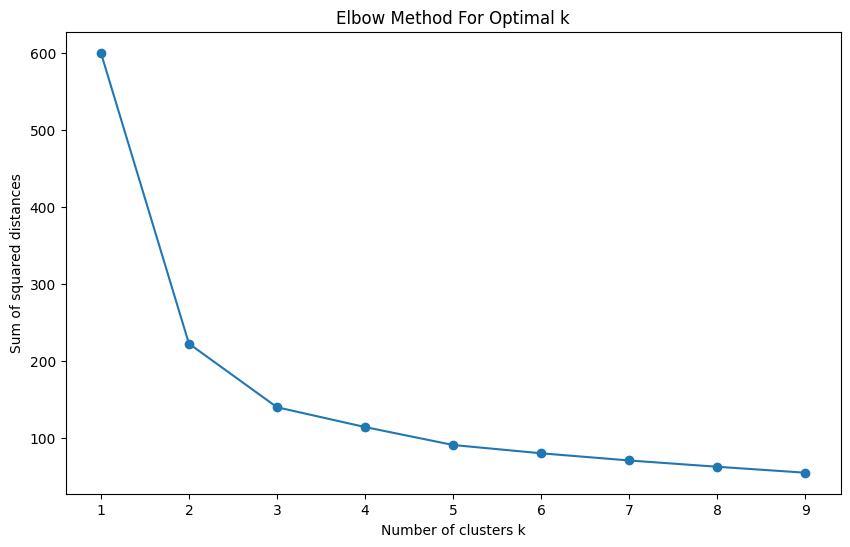

In [ ]:
# eg, use elbow method to choose the optimal number of clusters for k-means:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse = []  # Sum of squared distances
list_k = list(range(1, 10))  # Testing 1 to 9 clusters

for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Here we see that 3 is already a good number of clusters.

# Visualizations

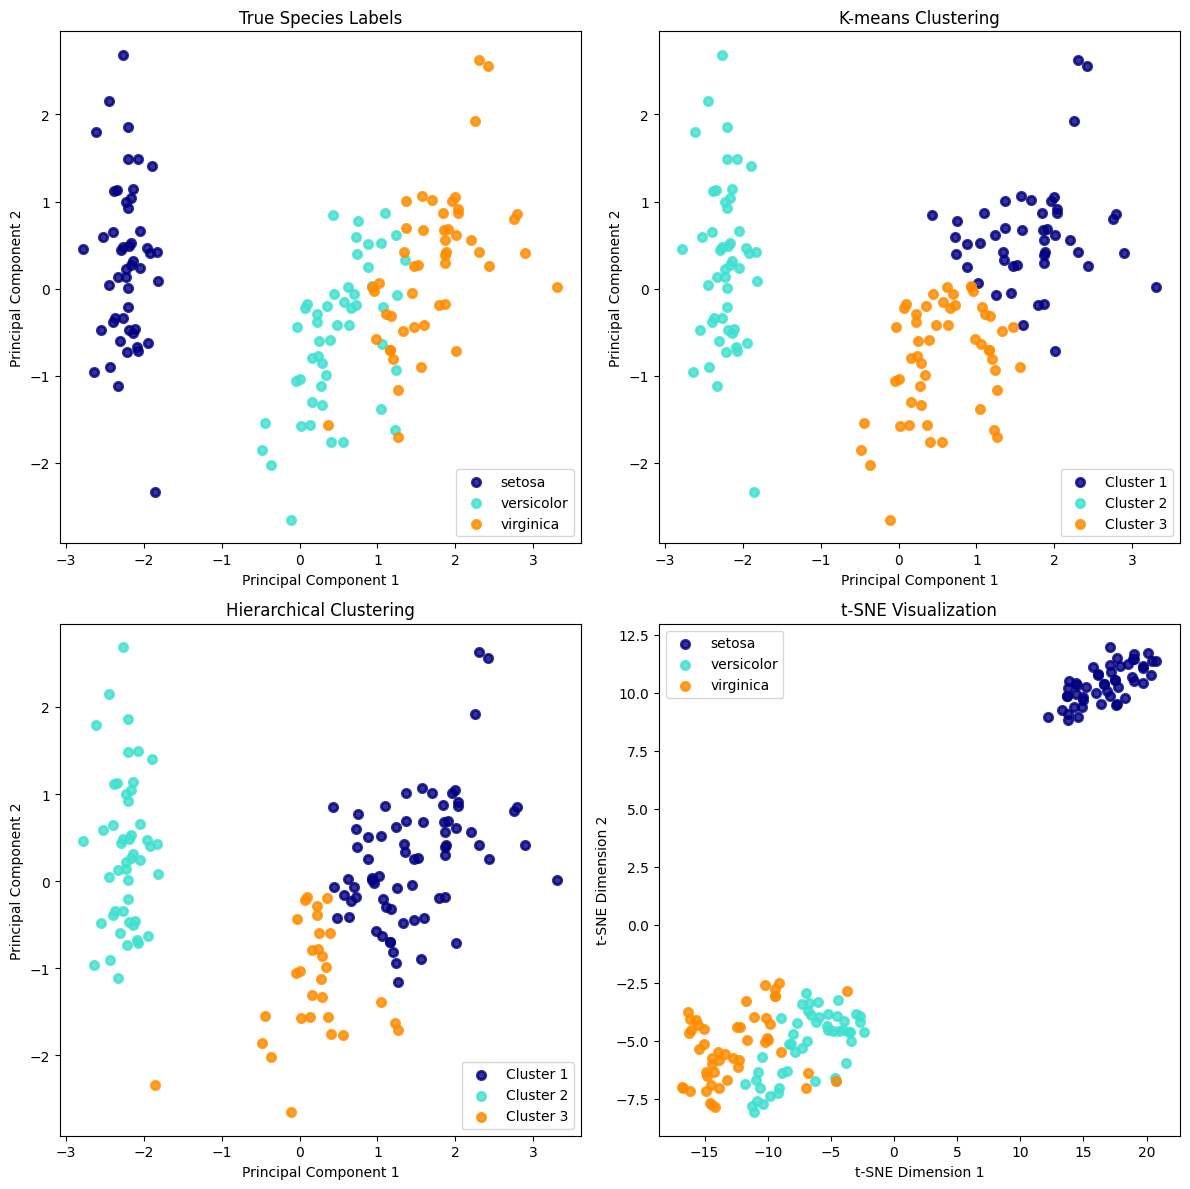

In [ ]:
# Visualizing Clustering and Dimensionality Reduction Results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

colors = ['navy', 'turquoise', 'darkorange']
lw = 2

# Plot true species labels
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    ax1.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
ax1.set_title('True Species Labels')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend(loc='best', shadow=False, scatterpoints=1)

# Plot K-means clustering labels
for color, i in zip(colors, [0, 1, 2]):
    ax2.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1], color=color, alpha=0.8, lw=lw, label=f'Cluster {i+1}')
ax2.set_title('K-means Clustering')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend(loc='best', shadow=False, scatterpoints=1)

# Plot hierarchical clustering labels
for color, i in zip(colors, [0, 1, 2]):
    ax3.scatter(X_pca[hierarchical_labels == i, 0], X_pca[hierarchical_labels == i, 1], color=color, alpha=0.8, lw=lw, label=f'Cluster {i+1}')
ax3.set_title('Hierarchical Clustering')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')
ax3.legend(loc='best', shadow=False, scatterpoints=1)

# Plot t-SNE visualization
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    ax4.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
ax4.set_title('t-SNE Visualization')
ax4.set_xlabel('t-SNE Dimension 1')
ax4.set_ylabel('t-SNE Dimension 2')
ax4.legend(loc='best', shadow=False, scatterpoints=1)

plt.tight_layout()
plt.show()

Apart from evaluation metrics like the silhouette score, we can also look at the visualizations to evaluate clustering results manually, by comparing the predicted cluster labels against the true cluster labels.

## Conclusion

Congratulations on completing this comprehensive lab on unsupervised machine learning techniques! Throughout this exercise, you've successfully:

1. Worked with the Iris dataset, a classic benchmark in machine learning
2. Preprocessed the data using StandardScaler for feature normalization
3. Implemented and compared two clustering algorithms:
   - K-means Clustering
   - Hierarchical Clustering (Agglomerative)
4. Evaluated clustering performance using the silhouette score
5. Applied dimensionality reduction techniques:
   - Principal Component Analysis (PCA)
   - t-Distributed Stochastic Neighbor Embedding (t-SNE)
6. Used the elbow method to determine the optimal number of clusters for K-means
7. Created visualizations to compare:
   - True species labels
   - K-means clustering results
   - Hierarchical clustering results
   - t-SNE visualization of the dataset

Key takeaways from this lab:

- The importance of data preprocessing in unsupervised learning
- How different clustering algorithms can produce varying results on the same dataset
- The value of dimensionality reduction for visualization and potentially improving clustering performance
- The usefulness of the elbow method in determining the optimal number of clusters
- The power of visualization in understanding and interpreting unsupervised learning results

This lab has provided you with hands-on experience in applying unsupervised learning techniques to real data. You've gained insights into how these methods can reveal inherent structures in data without prior labeling, which is useful for exploratory data analysis and pattern discovery in various fields of study and industry applications.